In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model,datasets
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,680000
4,4000,5.0,8,725000


In [3]:
#some changes(just ignore)
df.loc[3,'price']=595000
df.loc[4,'price']=760000
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


### Handling null ( missing value )

In [4]:
import math
# math.floor to get integer value instead of float
median = math.floor(df.bedrooms.median())
median

3

In [5]:
#fillna to find and place the desired value
df.bedrooms=df.bedrooms.fillna(median)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


### Creating LR object

In [6]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [7]:
reg.predict([[3000,3,5]])

array([683275.])

# Regression Evaluation Matrix

### 1. Mean Squared Error

In [8]:
print("Mean Squared Error: ",mean_squared_error(df.price,reg.predict(df[['area','bedrooms','age']])))
# y= ax + bw + cz + c1
print("Weights: ",reg.coef_) # a,b,c in y= ax + bw + cz + c1
print("Intercept: ",reg.intercept_) # c1 in equation

Mean Squared Error:  288000000.0
Weights:  [   137.25 -26025.    -6825.  ]
Intercept:  383724.9999999998


### 2. R Squared 

In [9]:
reg.score(df[['area','bedrooms','age']],df.price)

0.9488817891373802

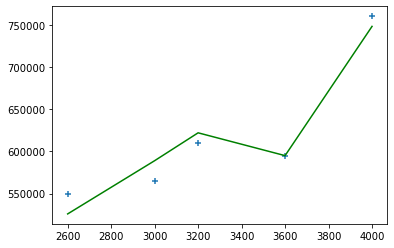

In [10]:
plt.scatter(df.area,df.price,marker="+")
plt.plot(df.area,reg.predict(df[['area','bedrooms','age']]),color="green")